# Blazars/Non-Blazars (AGNs) Samples Definition

### These notebook is to define the samples of sed data of blazars and non-blazar objects for future training of the neural network.

A list of ID and coordinates (RA, Dec) is obtained for the blazar dataset (5699 from the OU4v2 catalog) and for agns (3489 from the mqv7.2 catalog).

This list will be given as input to the VOU_Blazar tool (Radius of 15 arcsec) to get the files with the sed data.

In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
print(sns.__version__)

import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import os

0.11.2
1.4.1
1.18.5


In [2]:
blcatalog = 'OU4Bl_v2.csv'
agncatalog = 'milliquasv7.2.txt'

In [3]:
%ls

2whsp_list.csv        milliquasv7.2.txt  OU4Bl_v2.csv
3hsp.csv              mqv7.2agn_qrx.csv  preparationSED_BUILDERdata.ipynb
5bzcat_list.csv       newfile.txt        preparationVOUBdata.ipynb
Check_run_VOUB.ipynb  nn_data.npz
data/                 nn_datavoub.npz


# Blazar sample

In [4]:
ou4bl = pd.read_csv(blcatalog, encoding='utf-8-sig')
ou4bl.sample(10)

,id,Source name,R.A.,Dec,Radio flux d.,Fermi flux,Log nu_peak,Redshift,Original catalog
3822,3823,3HSPJ140848.1+221433.5,14 08 48.13,+22 14 33.5,15.5,0.000000e+00,15.7,0.291,3HSP
2771,2772,5BZQJ1058-3024,10 58 00.42,-30 24 55.0,261.0,0.000000e+00,0.0,2.523,5BZCAT
3467,3468,3FGLJ1304.2-2411,13 04 16.77,-24 12 16.99,59.6,6.260000e-12,0.0,0.000,Fermi 3LAC
3688,3689,4FGLJ1344.4-3656,13 44 23.81,-36 56 27.99,736.5,4.030000e-12,0.0,0.000,Fermi 3LAC
5481,5482,4FGLJ2143.0-5501,21 41 44.29,-55 09 29.8,0.0,0.000000e+00,0.0,0.000,Fermi 4LAC
394,395,5BZQJ0126+2559,01 26 42.78,+25 59 01.21,1003.0,0.000000e+00,0.0,2.358,5BZCAT
5198,5199,5BZQJ2006+6424,20 06 17.68,+64 24 45.39,519.0,2.840000e-12,0.0,1.574,5BZCAT
1751,1752,3FGLJ0730.3+6720,07 31 25.39,+67 18 47.01,0.0,0.000000e+00,0.0,0.000,Fermi 3LAC
2582,2583,5BZBJ1021+1411,10 21 30.73,+14 11 37.28,15.0,0.000000e+00,0.0,0.510,5BZCAT
5058,5059,3FGLJ1912.0-0804,19 12 07.12,-08 04 21.89,363.4,2.040000e-11,0.0,0.000,Fermi 3LAC


In [5]:
# convert coordinates
def sex2deg(ra,dec):
    h,m,s = list(map(float,ra.split()))
    ra = s / 86400
    ra += m / 1440
    ra += h / 24
    ra *= 360
    
    d,m,s = dec.split()
    dec = float(s) / 3600
    dec += float(m) / 60
    if d[0] == '-':
        dec = float(d) - dec
    else:
        dec = float(d) + dec
    
    return ra,dec

In [6]:
RA_COL = 'R.A.'
DEC_COL = 'Dec'
def apply_df(df):
    try:
        bla = list(sex2deg(df[RA_COL],df[DEC_COL]))
    except:
        bla = [None,None]
    return bla

ou4bl[['RA','DEC']] = ou4bl.apply(apply_df, axis=1, result_type = 'expand')

In [7]:
ou4bl.head()

,id,Source name,R.A.,Dec,Radio flux d.,Fermi flux,Log nu_peak,Redshift,Original catalog,RA,DEC
0,1,3HSPJ000236.0-081532.4,00 02 36.06,-08 15 32.4,29.0,0.000000e+00,16.0,0.390,3HSP,0.650250,-8.259000
1,2,5BZBJ0002-0024,00 02 57.16,-00 24 47.01,178.0,0.000000e+00,0.0,0.523,5BZCAT,0.738167,-0.413058
2,3,4FGLJ0003.3-5905,00 03 13.32,-59 05 47.61,505.9,1.680000e-12,0.0,0.000,Fermi 4LAC,0.805500,-59.096558
3,4,4FGLJ0003.3-1928,00 03 18.66,-19 27 22.28,171.0,2.590000e-12,0.0,0.000,Fermi 4LAC,0.827750,-19.456189
4,5,5BZQJ0003+2129,00 03 19.32,+21 29 44.48,83.0,0.000000e+00,0.0,0.450,5BZCAT,0.830500,21.495689


In [8]:
ou4bl.columns

Index(['id', 'Source name', 'R.A.', 'Dec', 'Radio flux d.', 'Fermi flux',
       'Log nu_peak', 'Redshift', 'Original catalog', 'RA', 'DEC'],
      dtype='object')

In [9]:
# Description of the Blazars in the catalog
ou4bl.groupby('Original catalog').size().sort_values(ascending=False)

Original catalog
5BZCAT        3561
3HSP          1353
Fermi 4LAC     748
Fermi 3LAC     415
dtype: int64

In [10]:
# define the colums of interest
col = dict(idn='id',
           ra='RA',
           dec='DEC',
           name='Source name',
           redshift='Redshift',
           flux_radio='Radio flux d.',
           fermi_flux='Fermi flux',
           nupk='Log nu_peak',
           catalog='Original catalog'
          )

In [11]:
# Dataset per il run con VOU_Blazars in batch mode (6077 Blazars)

#ou4bl[[col['idn'],col['ra'],col['dec']]].to_csv('ou4bl_labelradec.csv', sep= ' ', encoding='utf-8-sig', index=False, float_format='%.5f')

# AGNs Sample

In [12]:
agns_v72 = pd.read_csv(agncatalog, encoding='utf-8-sig', delimiter = '|')
agns_v72.sample(10)

,RAJ2000,DEJ2000,Name,Type,Rmag,Bmag,Comment,R,B,z,Qpct,XName,RName,Lobe1,Lobe2
761832,170.928429,70.138904,WISEA J112342.81+700820.0,q,18.75,19.62,pG,-,-,1.000,100,,,,NaN
532915,134.458736,25.197057,SDSS J085750.09+251149.3,QR,21.16,21.30,gG,-,-,2.360,99,,VL0J085750.09+251149.4,FIRST J085750.0+251149,NVSS J085750.1+251149
540999,135.776797,57.281909,WISEA J090306.43+571654.8,q,19.78,20.19,jm,1,-,1.300,100,,,,NaN
805867,178.018949,20.272126,SDSS J115204.54+201619.6,Q,22.16,22.04,g,-,-,2.346,,,,,NaN
1491199,345.415764,-12.294401,WISEA J230139.78-121739.6,q,19.26,19.69,jG,-,-,1.400,100,,,,NaN
1054801,216.085137,38.475001,SDSS J142420.42+382829.9,QX,19.62,20.28,pG,1,1,1.663,96,4XMM J142420.3+382829,,,NaN
1288456,260.387762,51.023676,WISEA J172133.05+510125.4,q,20.72,21.44,jmG,n,1,1.300,99,,,,NaN
1351105,303.968479,13.380681,WISEA J201552.43+132250.4,q,18.79,19.76,p,1,1,0.200,99,,,,NaN
1316891,276.162556,-63.270611,J182439.01-631614.2,X,19.66,20.03,j,-,-,,93,2SXPS J182438.7-631611,,,NaN
713380,163.368087,27.029396,SDSS J105328.34+270145.8,Q,20.51,20.68,gG,-,-,2.529,,,,,NaN


In [13]:
agns_v72.columns

Index(['RAJ2000', 'DEJ2000', 'Name', 'Type', 'Rmag', 'Bmag', 'Comment', 'R',
       'B', 'z', 'Qpct', 'XName', 'RName', 'Lobe1', 'Lobe2'],
      dtype='object')

In [14]:
agns_v72.groupby('Type').size().sort_values(ascending=False)

Type
Q       707379
q       478297
X        83737
R        52371
QX       50952
qX       46025
qR       29917
N        25773
QR       24446
A        24114
AX        8100
K         4522
AR        4421
NR        4117
QRX       4093
2         3928
QR2       2150
qRX       2100
RX        1870
NX        1843
ARX       1831
R2        1786
qR2       1785
BRX       1658
q2         972
QR2X       877
BR         781
Q2         715
NRX        635
KX         524
qR2X       248
KR         174
NR2        165
Q2X        164
AR2X       150
AR2        145
R2X        142
N2         133
BX         106
2X          90
A2          87
q2X         80
BR2X        68
B           51
L           50
KRX         49
NR2X        43
A2X         42
BR2         27
KR2         18
K2          18
N2X         17
LX          10
B2X          8
KR2X         6
K2X          5
B2           5
LRX          3
LR           1
dtype: int64

In [15]:
# I select the type "QRX": QSO type-I broad-line core-dominated with Radio and X association (4093)
agns_qrx = agns_v72.loc[agns_v72['Type'].str.strip() == 'QRX']
agns_qrx.head()

,RAJ2000,DEJ2000,Name,Type,Rmag,Bmag,Comment,R,B,z,Qpct,XName,RName,Lobe1,Lobe2
1343,0.212906,11.236500,SDSS J000051.09+111411.2,QRX,17.16,17.99,pG,-,-,0.865,99,2RXS J000051.2+111422,FIRST J000051.0+111411,VL0J000051.07+111411.6,NaN
1520,0.240825,29.710146,SDSS J000057.79+294236.4,QRX,20.10,20.11,gG,-,-,0.760,100,2RXS J000058.1+294227,VL0J000057.78+294236.5,NVSS J000058.1+294237,2RXP J000058.5+294234
1787,0.285889,19.242694,TEX 2358+189,QRX,20.50,21.19,j,1,1,3.100,100,2SXPS J000108.5+191431,VL0J000108.62+191434.1,NVSS J000108.6+191434,NaN
2071,0.330319,19.429377,SDSS J000119.28+192545.7,QRX,19.97,20.61,gG,-,1,1.253,98,2SXPS J000119.2+192541,NVSS J000119.2+192548,,NaN
2227,0.353409,8.890468,SDSS J000124.81+085325.7,QRX,19.13,18.93,jG,-,-,1.051,99,2RXS J000124.9+085320,FIRST J000124.8+085325,NVSS J000124.8+085325,NaN


In [16]:
# Dataset agns per run VOU_Blazars

agns_qrx_labradec = agns_qrx[['RAJ2000','DEJ2000']]
#agns_qrx_labradec.to_csv('agns_qrx_labelradec.csv', sep= ' ')
agns_qrx.shape

(4093, 15)

# Preprocessing of the SED data file obteined with VOU_Blazars

At this point, the SED of each object (providing one) is built from `VOU-Blazars Tool`, in particular the SEDs automatically go inside `~/Vou_Blazars/Results/SEDtool/`. The data retrived are in the folder `data/VOUB_blazar`and `data/VOUB_agn`.

In [17]:
#function to create a list with path to files

def list_files_recursive(path):
    """
    Function to create a list with the absolute path to files.
    
    Parameter
    ---------
    path: str
        directory path
    """
    import os
    files = []
    # r = root, d = directories, f = files
    for r, d, f in os.walk(path):
          for file in f:
                if '.zip' in file:
                    continue
                files.append(os.path.join(r, file))
                
    return files

In [18]:
# Load SED data of the Blazars and AGNs from retrived frm the run of VOUB
dir_bl = 'data/VOUB_blazar/'
dir_agn = 'data/VOUB_agn/'

print(os.getcwd())

/home/elenagasparri/agilenusrc/Notebook


In [19]:
cur_dir = os.getcwd()
%ls

2whsp_list.csv        milliquasv7.2.txt  OU4Bl_v2.csv
3hsp.csv              mqv7.2agn_qrx.csv  preparationSED_BUILDERdata.ipynb
5bzcat_list.csv       newfile.txt        preparationVOUBdata.ipynb
Check_run_VOUB.ipynb  nn_data.npz
data/                 nn_datavoub.npz


In [20]:
# List of sed file of agn and blazar from VOUB

path_bl = os.path.join(cur_dir, dir_bl)
sed_bl = list_files_recursive(path_bl)
path_agn = os.path.join(cur_dir, dir_agn)
sed_agn = list_files_recursive(path_agn)

In [21]:
# Number of sed of blazars finally found
len(sed_bl)

5699

In [22]:
# Number of sed of agns finally found
len(sed_agn)

3489

### Preprocessing on sed files

In [23]:
# Preprocessing on blazar sed files

freq_all_bl=[]
flux_all_bl=[]
seddata_all_bl= []
point_sed_bl =[]

for file in sed_bl:
    df_sed = pd.read_csv(file, sep='|', names=['ra','dec','freq','dfreq','flux','dflux','mjd','dmjd','UL','UNK'])
    ul_idx = df_sed[(df_sed.UL=='UL')].index    # find upper limit in dataframe
    df_sed.drop(ul_idx,inplace=True)            # remove upper limit
    
    freq_opt = []                               # refined freq-flux array initialization
    flux_opt = []
    
    sed_data= df_sed[['freq','flux']].to_numpy()
    freq=sed_data[:,0]
    flux=sed_data[:,1]
    try:
        #deleting strange measures
        strange_flux_index = [i for i in range(len(freq)) if flux[i]>= 1e-5 or flux[i]<0]
        freq = np.delete(freq,strange_flux_index)
        flux = np.delete(flux,strange_flux_index)
        # if the frequencies are repeated, I keep the higher flux measurement
        for i in range(len(freq)):
            if np.size(np.where(freq_opt == freq[i]))>0:
                if flux[i] > flux_opt[np.where(freq_opt == freq[i])]:
                    flux_opt[np.where(freq_opt == freq[i])]=flux[i]
            else:
                freq_opt= np.append(freq_opt,freq[i])
                flux_opt= np.append(flux_opt,flux[i])
    except TypeError:
        freq_opt= np.append(freq_opt,freq[i])                       # In case there is only one freq-flux measurement
        flux_opt= np.append(flux_opt,flux[i])                       # does not give an error but simply appends value
    
    # Building arrays of interest
    freq_all_bl = np.append(freq_all_bl,freq_opt)                   # array 1-D whit all the frequencies
    flux_all_bl = np.append(flux_all_bl,flux_opt)                   # array 1-D whit all the fluxes
    freq_points_bl = np.unique(freq_all_bl)                         # array 1-D whit all the unique freq in the dataset
    freq_points_bl_ord = freq_points_bl[freq_points_bl.argsort()]   # array 1-D freq_points sorted
    seddata_all_bl.append((freq_opt,flux_opt))                      # tupla flux_all[i][j][k], i = source, j=0 or 1 freq or
                                                                    # flux measure, [k] = k-riga of the array
    point_sed_bl = np.append(point_sed_bl,len(freq_opt))            # array 1-D whit the number of points for sed

In [24]:
print('The number of different frequencies in the blazar dataset is ',freq_points_bl.shape)
print('The number of input vectors for blazars is ',len(seddata_all_bl))

The number of different frequencies in the blazar dataset is  (5603,)
The number of input vectors for blazars is  5699


### Preprocessing sui file delle sed degli AGNs per preparare input rete neurale

In [25]:
# Preprocessing on AGNs sed files


freq_all_agn=[]
flux_all_agn=[]
seddata_all_agn= []
point_sed_agn =[]

for file in sed_agn:
    df_sed = pd.read_csv(file, sep='|', names=['ra','dec','freq','dfreq','flux','dflux','mjd','dmjd','UL','UNK'])
    ul_idx = df_sed[(df_sed.UL=='UL')].index    # find upper limit in dataframe
    df_sed.drop(ul_idx,inplace=True)            # remove upper limit
    
    freq_opt = []                               # refined freq-flux array initialization
    flux_opt = []
    
    sed_data= df_sed[['freq','flux']].to_numpy()
    freq=sed_data[:,0]
    flux=sed_data[:,1]
    try:
        #deleting strange measures
        strange_flux_index = [i for i in range(len(freq)) if flux[i]>= 1e-5 or flux[i]<0]
        freq = np.delete(freq,strange_flux_index)
        flux = np.delete(flux,strange_flux_index)
        # if the frequencies are repeated, I keep the higher flux measurement
        for i in range(len(freq)):
            if np.size(np.where(freq_opt == freq[i]))>0:
                if flux[i] > flux_opt[np.where(freq_opt == freq[i])]:
                    flux_opt[np.where(freq_opt == freq[i])]=flux[i]
            else:
                freq_opt= np.append(freq_opt,freq[i])
                flux_opt= np.append(flux_opt,flux[i])
    
        # Building arrays of interest
        freq_all_agn = np.append(freq_all_agn,freq_opt)                    # array 1-D whit all the frequencies
        flux_all_agn = np.append(flux_all_agn,flux_opt)                    # array 1-D whit all the fluxes
        freq_points_agn = np.unique(freq_all_agn)                          # array 1-D whit all the unique freq in the dataset
        freq_points_agn_ord = freq_points_agn[freq_points_agn.argsort()]   # array 1-D freq_points sorted
        seddata_all_agn.append((freq_opt,flux_opt))                        # tupla flux_all[i][j][k], i = source, j=0 or 1 freq or
                                                                           # flux measure, [k] = k-riga of the array
        point_sed_agn = np.append(point_sed_agn,len(freq_opt))             # array 1-D whit the number of points for sed
        
    except TypeError:
        continue    

In [26]:
print('The number of different frequencies in the AGNs dataset is ',freq_points_agn.shape)
print('The number of input vectors for AGNs is ',len(seddata_all_agn))

The number of different frequencies in the AGNs dataset is  (3210,)
The number of input vectors for AGNs is  3488


# Generation of the dataset for the Neural Network

In [27]:
# I generate 'nn_freq_data' as a sorted vector containing all values of different frequencies that appear in the two
# data sets blazars and agns to create arrays of identical length for the neural network

tot_freq = np.append(freq_points_bl_ord,freq_points_agn_ord)
tot_freq_un = np.unique(tot_freq)
nn_freq_data = tot_freq_un[tot_freq_un.argsort()]

nn_freq_data.shape

(5617,)

In [28]:
def GenerateDataSet(nn_frequencies, sed_values):
    """
    A function that, given an ordered frequency array of lenght N, generates an array with shape (N,2)
    where the flux values are arranged in the right position with respect to the associated frequency.
    I assign zero to empty frequency position.
    In the second column we have a flag at 1 to identify "real" measures.
    
    Parameters
    ----------
        
    nn_frequencies: array 1-D
                    Numpy array sorted with all the different frequencies in the blazar + agns data sets.
                    
    sed_values: tupla 
                All dataset (blazars or agns) [i]= sources, [j]= 0 (freq), 1(flux), [k]=k-riga dell'array
    """
    data = []
    for x in sed_values:
        temp = np.zeros((nn_frequencies.shape[0],2))
        for i in range(len(x[0])):
            idx = np.where(nn_frequencies == x[0][i])
            temp[idx,0] = x[1][i]
            temp[idx,1]=1                        # flag at 1 for real data in sed file
        data.append(temp)
    return np.array(data)

In [29]:
# n-D numpy array with blazar's data for the neural network
bl_data = GenerateDataSet(nn_freq_data, seddata_all_bl)

bl_data.shape

(5699, 5617, 2)

In [30]:
# n-D numpy array with agn's data for the neural network
agn_data = GenerateDataSet(nn_freq_data, seddata_all_agn)

agn_data.shape

(3488, 5617, 2)

In [31]:
# I save the two numpy ndarrays with blazar and agn data and the array with the ordered frequencies
# in the file nn_datavoub.npz which I will use in the neural network

np.savez('nn_datavoub.npz',bl_data = bl_data, agn_data = agn_data, nn_freq_data = nn_freq_data)

# Some Plot of data

In [32]:
# Histogram of the number of sources per amount of data points in the SED

def histData(points_bl, points_agn):
    ''' Histogram of the amount of data points per SED file
    
    Parameters
    ----------
        points_bl = numpy array like points_per_sed of Blazars sources
        points_agn = numpy array like points_per_sed of AGN sources
    '''
    plt.figure()
    plt.title('Number of sources per amount of data points in the SED')
    plt.xlabel('Points per SED')
    plt.ylabel('Numbers of sources')
    plt.grid(True)
    bins = np.logspace(0, 3, 50)
    plt.xscale('log')

    n, bins, patches=plt.hist(points_bl, bins=bins, alpha=1.0, histtype='step', label='Blazars')
    n_1, bins_1, patches_1=plt.hist(points_agn, bins=bins, alpha=1.0, histtype='step', label=f'AGNs')
    plt.legend(loc='upper right')
    plt.show()

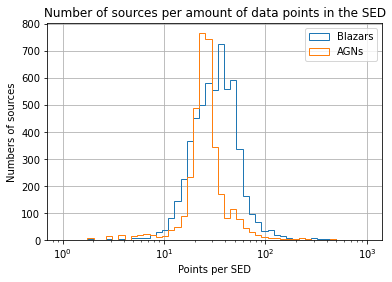

In [33]:
#plot of VOUB data
histData(point_sed_bl,point_sed_agn)

In [34]:
# plotting the SEDs of all files to see how the points are distributed

def sedDistribution(sed_data_all,mode):
    ''' Plot of the SED files.
    
    Parameters
    ----------
        
    sed_data_all: tupla
                Full dataset with freq e flux like seddata_all_***
    
    mode: boolean
        'True' stands for blazar and 'False' for AGNs
    '''
    plt.figure()
    if mode:
        plt.title('Superimposed Plot of the SED of the entire Blazars dataset')
    else:
        plt.title('Superimposed Plot of the SED of the entire AGNs dataset')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    plt.grid(True)
    for sed in sed_data_all:
        freq= sed[0]
        flux= sed[1]
        plt.loglog(freq, flux, 'b.', markersize=1)
    plt.show()

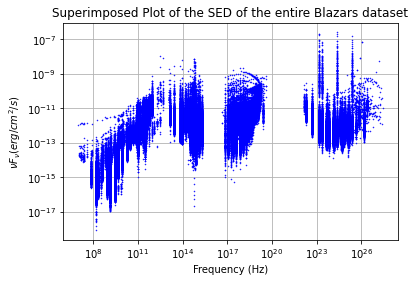

In [35]:
sedDistribution(seddata_all_bl,True)

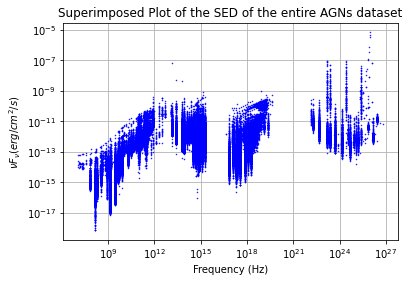

In [36]:
sedDistribution(seddata_all_agn,False)

In [37]:
#Scatter plot of the SED files with color map for the recurrent point

def sedColormapPlot(sed_data_all,mode):
    ''' Scatter plot of the SED files with color map for the recurrent point
    
    Parameters
    ----------
            
    sed_data_all: tupla
                Full dataset with freq e flux like seddata_all_***
    
    mode: boolean
        'True' stands for blazar and 'False' for AGNs
    '''
    dens = np.zeros((1,3))
    for sed in sed_data_all:
        freq= sed[0]
        flux= sed[1]
        # With the ndarray dens I count how many times in total I have the same freq/flux measurement
        # The third column of the array tells us the number of times the measurement is repeated in the whole dataset.
        for i in range(len(freq)):
            if np.size(np.where(np.logical_and(dens[:,0] == freq[i], dens[:,1] == flux[i]))[0]) > 0:
                dens[np.where(np.logical_and(dens[:,0] == freq[i], dens[:,1] == flux[i]))[0],2] += 1
            else:
                dens = np.vstack([dens,[freq[i],flux[i],1]])
    densn = np.delete(dens,(0),axis=0)                              #remove the first line of zeros
    
    plt.figure()
    fig,ax = plt.subplots()
    if mode:
        fig.suptitle('Density plots of the SEDs of Blazars data set')
    else:
        fig.suptitle('Density plots of the SEDs of AGNs data set')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    ax.grid(False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    im = ax.scatter(densn[:,0],densn[:,1], c = densn[:,2], cmap ='viridis',marker='.', alpha=0.5)
    fig.colorbar(im, ax=ax)
    plt.show()

<Figure size 432x288 with 0 Axes>

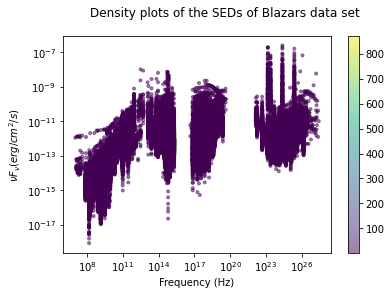

In [38]:
#plot of SED Builder data
sedColormapPlot(seddata_all_bl,True)

<Figure size 432x288 with 0 Axes>

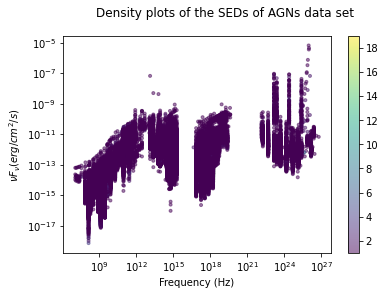

In [39]:
#Plot of SED Builder Data
sedColormapPlot(seddata_all_agn, False)

In [40]:
# Hist2D of the SEDs in our blazars data set
# freq_all e flux_all sono array con tutte le coppie di dati del dataset anche ripetute
def hist2dSed(freq_all,flux_all,mode):
    '''Hist2D of the SEDs of the entire data set.
    
    Parameters
    ----------
    
    freq_all,flux_all: 1D-array
                        all the couple of data of type Blazar or AGNs
    
    mode: boolean
        'True' for Blazars data and 'False' for AGNs data
    '''
    plt.figure()
    if mode:
        plt.title('2D Histogram of the SEDs of Blazars data set')
    else:
        plt.title('2D Histogram of the SEDs of AGNs data set')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    plt.grid(False)

    plt.xscale('log')
    plt.yscale('log')

    x_bins = np.logspace(6, 27,200)
    y_bins = np.logspace(-20,-7,200)
    #plt.hist2d(freq_all,flux_all, bins=[x_bins,y_bins], vmin =10, cmap = 'BuPu')
    plt.hist2d(freq_all,flux_all, bins=[x_bins,y_bins], vmin =-10, cmap = 'twilight')
    cb = plt.colorbar()
    cb.set_label('counts in bin')
    plt.show()

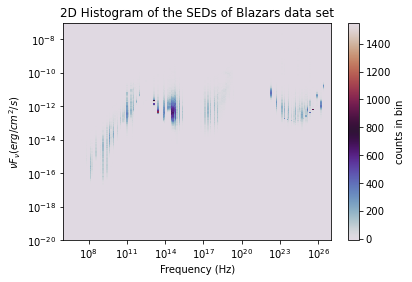

In [41]:
hist2dSed(freq_all_bl,flux_all_bl,True)

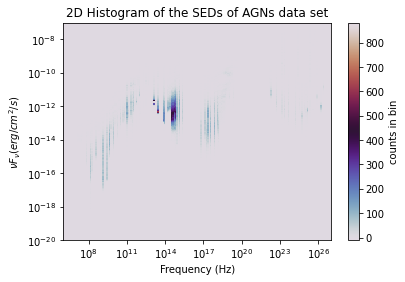

In [42]:
hist2dSed(freq_all_agn,flux_all_agn,False)